
Importing important libraries

The below codes will extract text from the documents.

In [ ]:

#Importing all the neccessary library

from bs4 import BeautifulSoup
import requests
import os
import re
import pandas as pd
 
#please paste your dirctory here
y="F:\core banking"
groups=["Data","Resources","Skins"]
docs={}
os.chdir(y)
ans1=[]
for i in os.listdir():
    c=y+"\\"+i
    
    os.chdir(c)
    z=os.listdir()
    docs[i]=""
    for p in z:
        if not p.endswith((".htm",".js",".mcwebhelp",".xml")) and p not in groups:
            ans1.append(i)
            os.chdir(c+"\\"+p)
            loc=os.getcwd()
            
            
            cleanr = re.compile('<.*?>')  # removing tags
            for k in os.listdir():
                try:
                 os.chdir(k)
                 
            
                 for j in os.listdir():
                     with open(j) as html_file:
                         soup = BeautifulSoup(html_file, "lxml")
                     doc=""
                     match = soup.find("div", class_="first_div")
                     cleantext = re.sub(cleanr, '', str(match))
                     doc = doc + cleantext
                     docs[i]=docs[i]+doc
                except:
                    print("not selecting html")
            
                os.chdir(loc)
                
                
"""the above codes will extract the html document and convert in plain text using beautiful soup."""
#creating a dataframe with the extracted text ,the columns are the folders from which html text is extracted

df=pd.DataFrame(list(docs.items()),columns=["Categories","Documents"])


The below codes are for scripts which we need to predict,
The scripts are basically in key value kind of like json file and we are going to take its sstobject list only and then convert in plain text and also preprocess and lemmatize it

In [58]:
#open a single script which need to predict
import json
with open("/content/SCRPT101811001001.scripts") as file_obj:
  data=json.load(file_obj)
print(data)
corpus=[]
bow=[]
payments={}
payments[data["scenarioId"]]=data["sstObjectList"]

script_data=[]
for i in payments.values():
  script_data.append(i)


for j in payments.values():
    corpus.append(j)
    
for l  in corpus:
    for words in l:
        bow.append(words)

text_corpus=[]
for i in bow:
    for j in i.values():
        if j!=["NONE"] and j!=[''] and j!=[] and str(j)!="":
        
            text_corpus.append(j)
# Tokenize(split) the sentences into words
texts = []
for i in text_corpus:
    k=str(i)
        
    texts.append(k)
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
    
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(texts))
import nltk
nltk.download('stopwords')

{'rootDirectory': '', 'scenarioId': 'SCRPT101811001001', 'sstObjectList': [{'scriptId': 'SCRPT101811001001-011', 'description': 'Creation of Functionality Record For Set up Data To be owned by Regression Team', 'companyCode': 'US0010001', 'scriptStatus': 'ACTIVE', 'scriptSource': 'EN-3058108', 'alternateRef': '', 'selectRoutine': '', 'baseRelease': '', 'productGroup': 'PAYMENTS', 'productCode': 'SE', 'scriptGroup': 'TB00\uf8fdTB00-PREUPG', 'application': 'SEAT.FUNCTIONALITY.COMPONENT', 'staticSetup': 'R20.ST01', 'version': 'SEAT.FUNCTIONALITY.COMPONENT,SEAT.ZERO', 'function': 'I', 'transactionId': 'BASE.SETUP', 'fieldDefinition': [{'fieldName': 'DESCRIPTION:1:1', 'fieldValue': 'Regression Bank Base Set up', 'fieldInput': 'YES'}, {'fieldName': 'COMPONENT:1:1', 'fieldValue': "RE'_'Config", 'fieldInput': 'YES'}, {'fieldName': 'FUNCTIONALITY.REF:1:1', 'fieldValue': '01', 'fieldInput': 'YES'}, {'fieldName': 'PRODUCT.GROUP:1:1', 'fieldValue': 'REGRESSION', 'fieldInput': 'YES'}], 'generateErr

True

In [59]:
import nltk

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


# spacy for lemmatization


# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]



# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [60]:
import en_core_web_sm
nlp = en_core_web_sm.load()

data_lemmatized = lemmatization(data_words_nostops,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
datax=data_words_nostops
actual_data=[]

for i in datax:
    for j in i:
        actual_data.append(j)

In [66]:
import pandas as pd
actual_test=" "
for i in actual_data:
  actual_test+=" "+i
new_data=pd.Series(actual_test)


# Importing All the important libraries which we need for this project

In [1]:

import os


import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


from numpy import random
import gensim
import nltk

from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
df=pd.read_csv("/content/temenos dataframe final.csv", index_col=[0])
df.head()

,Categories,Documents
0,AA,\nConfiguring Account Statements\nThis topic h...
1,AB,\nConfiguring Account Creation\nThis topic hel...
2,AC,\nConfiguring Account Closure\nThere is no con...
3,AC_CQ,\nConfiguring Charge on Cheque/Draft\nThere is...
4,AD,\nIntroduction\nStatement Property Class is us...


In [3]:

df.shape

(51, 2)

importing stopwords to clean and preprocess the text

#nltk library to preprocess our text

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
import re

So the below function will clean our text.

In [6]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    


#After splitting the data set, the next steps includes feature engineering. We will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer).


#plotting the distribution of our dataset

lets see our dataframe now

In [7]:
df.head()

,Categories,Documents
0,AA,\nConfiguring Account Statements\nThis topic h...
1,AB,\nConfiguring Account Creation\nThis topic hel...
2,AC,\nConfiguring Account Closure\nThere is no con...
3,AC_CQ,\nConfiguring Charge on Cheque/Draft\nThere is...
4,AD,\nIntroduction\nStatement Property Class is us...


In [8]:
df.shape

(51, 2)

In [9]:
df["Documents"].head()

0    \nConfiguring Account Statements\nThis topic h...
1    \nConfiguring Account Creation\nThis topic hel...
2    \nConfiguring Account Closure\nThere is no con...
3    \nConfiguring Charge on Cheque/Draft\nThere is...
4    \nIntroduction\nStatement Property Class is us...
Name: Documents, dtype: object

#Removing Null values from Documents column

In [10]:
df = df[pd.notnull(df['Documents'])]

In [11]:
df.head()

,Categories,Documents
0,AA,\nConfiguring Account Statements\nThis topic h...
1,AB,\nConfiguring Account Creation\nThis topic hel...
2,AC,\nConfiguring Account Closure\nThere is no con...
3,AC_CQ,\nConfiguring Charge on Cheque/Draft\nThere is...
4,AD,\nIntroduction\nStatement Property Class is us...


applying clean_text function to clean all the rows from Documents column

In [12]:

df['Documents']=df['Documents'].apply(clean_text)

In [13]:


df.head()

,Categories,Documents
0,AA,configuring account statementsthis topic helps...
1,AB,configuring account creationthis topic helps u...
2,AC,configuring account closurethere configuration...
3,AC_CQ,configuring charge cheque draftthere configura...
4,AD,introductionstatement property class used spec...


To understan our predictive model,we need to represent each label as a number

In [14]:
df

,Categories,Documents
0,AA,configuring account statementsthis topic helps...
1,AB,configuring account creationthis topic helps u...
2,AC,configuring account closurethere configuration...
3,AC_CQ,configuring charge cheque draftthere configura...
4,AD,introductionstatement property class used spec...
5,AG,configuring activity based commissionthe activ...
6,AR,configuring accounting retail accountsthe acco...
7,AU,accounting authere configuration content featu...
8,BM,introduction business monitoringthis page inte...
9,CL,configuring account creationthis topic helps u...


forming a dictionary 

In [17]:
#Create a new column 'category_id' with encoded categories 
df['category_id'] = df['Categories'].factorize()[0]


In [19]:
category_id_df = df[['Categories', 'category_id']].drop_duplicates()
print(category_id_df)

   Categories  category_id
0          AA            0
1          AB            1
2          AC            2
3       AC_CQ            3
4          AD            4
5          AG            5
6          AR            6
7          AU            7
8          BM            8
9          CL            9
10         CO           10
12         DA           11
14         DC           12
15         DE           13
17         DX           14
18         DZ           15
19         EB           16
21         ER           17
22         EU           18
23         FF           19
24         FR           20
25         FX           21
26         GP           22
27         IC           23
30         LC           24
31         MC           25
32         MD           26
33         MM           27
34         MS           28
35        NDF           29
36         NS           30
37         PC           31
38         PM           32
40         PW           33
41         RC           34
42         RE           35
4

In [21]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Categories']].values)

# New dataframe
df.head()

,Categories,Documents,category_id
0,AA,configuring account statementsthis topic helps...,0
1,AB,configuring account creationthis topic helps u...,1
2,AC,configuring account closurethere configuration...,2
3,AC_CQ,configuring charge cheque draftthere configura...,3
4,AD,introductionstatement property class used spec...,4


#plotting

Categories
AA       1
AB       1
AC       1
AC_CQ    1
AD       1
AG       1
AR       1
AU       1
BM       1
CL       1
CO       1
DA       1
DC       1
DE       1
DX       1
DZ       1
EB       1
ER       1
EU       1
FF       1
FR       1
FX       1
GP       1
IC       1
LC       1
MC       1
MD       1
MM       1
MS       1
NDF      1
NS       1
PC       1
PM       1
PW       1
RC       1
RE       1
RS       1
SF       1
SL       1
ST       1
SW       1
Skins    1
dtype: int64


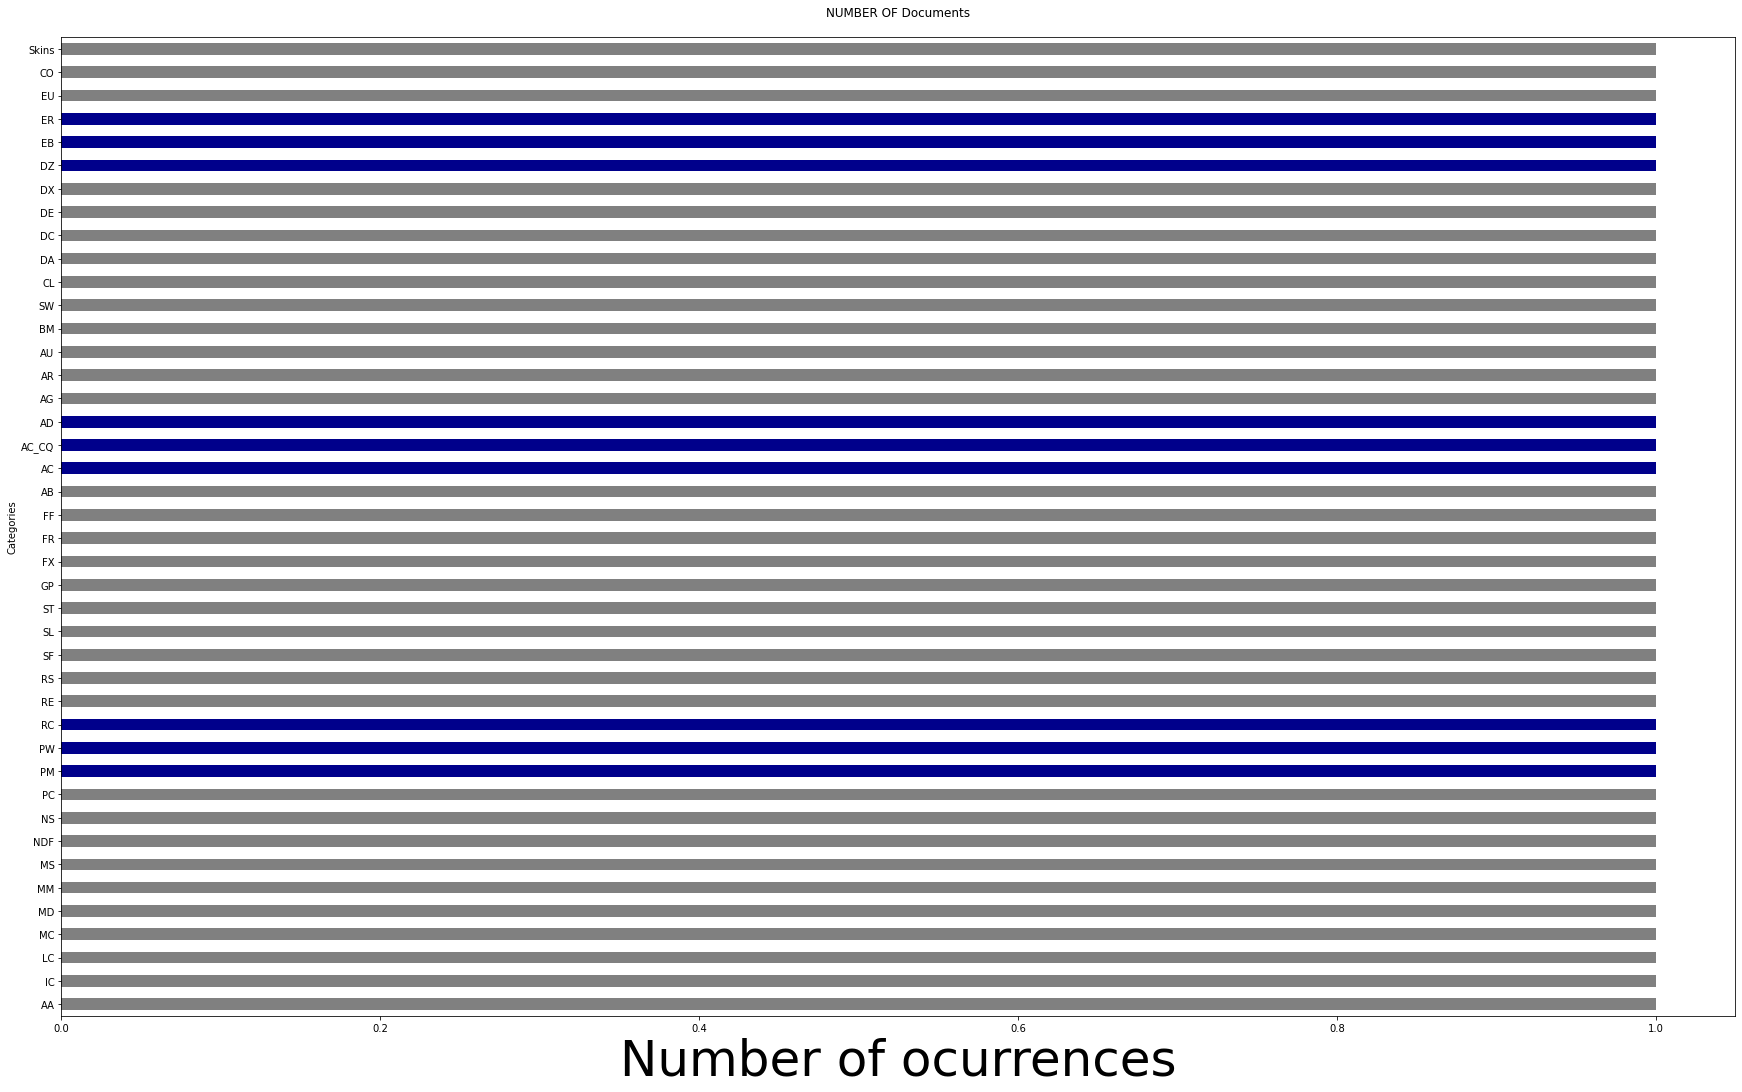

In [22]:

fig = plt.figure(figsize=(30,18))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df.groupby('Categories').Documents.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF Documents\n')
plt.xlabel('Number of ocurrences', fontsize = 50);
print(df.groupby('Categories').size())
plt.show()


So the above bar chart represents the number of Documents per label.
As i also mentioned using groupby function the frequency with corresponding labels.
Accounts has highest number  of Documents

Text-processing:- we have to convert the text to vectorize it after lowing and removing stop words .
TF_IDF will give us the most important words in our text

The tf=idf model is the model of tf and idf.
TF:- term frequency ,it tells us the frequency of words in a given document
IDF:- Inverse-Document-Frequency,it tells us ,how rare or commom a word in the document


TfidfVectorizer class can be initialized with the following parameters:

min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.
sublinear_tf: set to True to scale the term frequency in logarithmic scale.
stop_words: remove the predefined stop words in 'english'.
use_idf: weight factor must use inverse document frequency.
ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [23]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each Documents into a vector
features = tfidf.fit_transform(df.Documents).toarray()

labels = df.category_id

print("Each of the %d Documents is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 42 Documents is represented by 4190 features (TF-IDF score of unigrams and bigrams)


In [24]:
# Finding the three most correlated terms with each of the categories
N = 3
for Categories, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Categories))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> AA:
  * Most Correlated Unigrams are: advices, alert, sms
  * Most Correlated Bigrams are: account statements, arrangement created, account property

==> AB:
  * Most Correlated Unigrams are: compensation, nonfinancial, recipient
  * Most Correlated Bigrams are: product line, periodic charge, waive charge

==> AC:
  * Most Correlated Unigrams are: overdrawn, cutoff, bal
  * Most Correlated Bigrams are: debit transaction, credit check, available funds

==> AC_CQ:
  * Most Correlated Unigrams are: stopped, stop, presented
  * Most Correlated Bigrams are: message sent, following screenshot, updated status

==> AD:
  * Most Correlated Unigrams are: hierarchy, unallocated, memo
  * Most Correlated Bigrams are: attribute used, t24 account, account property

==> AG:
  * Most Correlated Unigrams are: tier, context, agents
  * Most Correlated Bigrams are: commission type, base date, financial arrangement

==> AR:
  * Most Correlated Unigrams are: eligibility, intervals, referal
  * Most Co

In [25]:
for Categories, category_id in sorted(category_to_id.items()):
  feature_names = np.array(tfidf.get_feature_names())[indices]
print(feature_names)

['table information' 'good' 'possible make' ... 'intentionally left'
 'page intentionally' 'account']


Multi-Classification models
The classification models evaluated are:

Random Forest
Linear Support Vector Machine
Multinomial Naive Bayes
Logistic Regression.

In [26]:
df["Documents"][0]

'configuring account statementsthis topic helps user configure statement property class printstatement applicationaccount statement passbooksbanks choose generate account statements regular basis give customer choice passbook updates options mutually exclusive enable passbook facility account productaccount product category included savings record accountclass applicationpassbook field set yes arrangement accountto generate account statements fields accountstatement records defaulted stmtgencondition acstmtparameter applications read account statements section account user guide information account statement conditions updated using statement property class product account statement conditionsthis topic explains attributes statement property class configuration options explained topic statement preferred date frequencystatements produced working daysfor 19 weekstwice month 15thand last day month 112 months using day month anniversary month end date statement1 frequency 1 field specifie

In [28]:
from itertools import islice

In [29]:
import math

So the below code is very important ,it split the rows  in k words and make a dataframe using pandas.explode.
Which make our data more readable and at the same time more suitable for classifiers

In [30]:
for i in df.index:
  
  corpus=str(df["Documents"][i])

  x=corpus.split()
  Len=len(x)
  chunk=1000
  splits=math.ceil(Len/chunk)
  df["Documents"][i]=[]
  for j in range(splits):
    start=j*1000
    end=(j+1)*1000

    if end>Len:
      end=Len
    a=x[start:end]

    b=" ".join(a)
    
    df["Documents"][i].append(b)



    



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [31]:
df = df.explode("Documents").reset_index(drop=True)

In [32]:
df.head(100)

,Categories,Documents,category_id
0,AA,configuring account statementsthis topic helps...,0
1,AA,within given cycle however statement includes ...,0
2,AA,processed close business system moves related ...,0
3,AA,event moved event log running event servicethe...,0
4,AA,required application alsoexample user wants up...,0
...,...,...,...
95,DE,processes handled either following waysif erro...,13
96,DE,include batched messages test key input author...,13
97,DE,deaddress record error corrected adding deaddr...,13
98,DE,detranslation application record found detrans...,13


In [33]:
df['totalwords'] = df['Documents'].str.count(' ') + 1


df=df[df["totalwords"]>=100]

df

,Categories,Documents,category_id,totalwords
0,AA,configuring account statementsthis topic helps...,0,1000
1,AA,within given cycle however statement includes ...,0,1000
2,AA,processed close business system moves related ...,0,1000
3,AA,event moved event log running event servicethe...,0,1000
4,AA,required application alsoexample user wants up...,0,1000
...,...,...,...,...
424,SW,accrual corrects interest amount required mult...,41,1000
425,SW,fixed one currency specifiedpi int keythe desc...,41,1000
426,SW,quarterly instalments annuity payment ap sched...,41,1000
427,SW,accounting entries duplicates created cob proc...,41,1000


The distribution of our dataframe

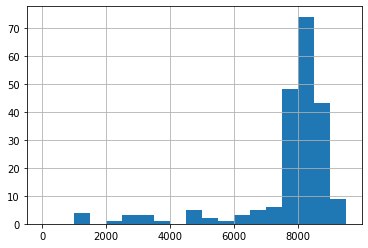

In [67]:
lens = df.Documents.str.len()
lens.hist(bins = np.arange(0,10000,500))

#checking  any missng Values

In [35]:
print('Number of missing document in document text:')
df['Documents'].isnull().sum()

Number of missing document in document text:


0

In [191]:
df.tail()

,Categories,Documents,category_id,totalwords
424,SW,accrual corrects interest amount required mult...,41,1000
425,SW,fixed one currency specifiedpi int keythe desc...,41,1000
426,SW,quarterly instalments annuity payment ap sched...,41,1000
427,SW,accounting entries duplicates created cob proc...,41,1000
428,SW,2 72331the table displays zero coupon rate arr...,41,762


In [192]:
df["Documents"][1]

'within given cycle however statement includes entries generated last statementat arrangement level user attempts create arrangement system defaults statement condition defined product level user change default value subject negotiation rules statement type addonthe statement type attribute statement condition used specify account format enquiry defined record print statement statement addon multivalue field indicates optional add formatting enquiry allowed addons defined print statement record statement type chosen system validates addon allowed addon statement typestatement addon left negotiable chosen account levelit also optional print addon statement new page screenshot allowed addons rate change balance summary ar statement addons added statement type ar statementcombined statements combined statement consolidation individual statements based customer choice arrangements arrangements include loans deposits accounts aa external plus arrangements summary page added needed user desi

In [36]:
len(df.Categories.unique())

37

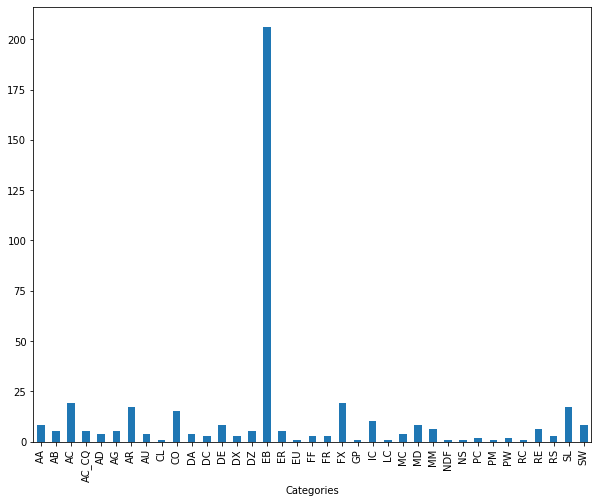

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
df.groupby('Categories').Documents.count().plot.bar(ylim=0)
plt.show()

As we can see in our preprocess dataframe ,Categorie "EB" has highest number of rows and it is outlier we need to remove it so that we can avoid overfitting

In [38]:
df=df[df.Categories != 'EB']

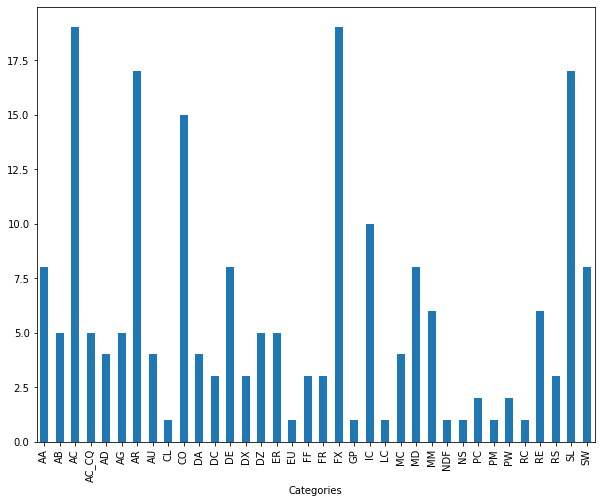

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
df.groupby('Categories').Documents.count().plot.bar(ylim=0)
plt.show()

In [42]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each Documents into a vector
features = tfidf.fit_transform(df.Documents).toarray()

labels = df.category_id

print("Each of the %d Documents is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 209 Documents is represented by 4834 features (TF-IDF score of unigrams and bigrams)


Now we are using different machine learning algorithms to classify our script

In [93]:
X = df.Documents
y = df.Categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

my_tags= df.Categories.unique()

Target_class=df["Categories"].unique()
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',  OneVsRestClassifier(MultinomialNB())),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))

print(nb.predict(new_data))


accuracy 0.38095238095238093
['AR']


In [92]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(sgd.predict(new_data))


accuracy 0.7169811320754716
              precision    recall  f1-score   support

          AA       0.00      0.00      0.00         3
          AB       0.00      0.00      0.00         1
          AC       1.00      0.80      0.89         5
       AC_CQ       1.00      1.00      1.00         1
          AD       0.00      0.00      0.00         1
          AG       1.00      0.50      0.67         2
          AR       0.33      1.00      0.50         2
          AU       1.00      0.50      0.67         2
          CO       1.00      1.00      1.00         4
          DA       0.50      0.50      0.50         2
          DE       0.67      0.67      0.67         3
          DZ       0.00      0.00      0.00         2
          ER       1.00      1.00      1.00         1
          FR       1.00      1.00      1.00         1
          FX       1.00      0.71      0.83         7
          IC       0.75      1.00      0.86         3
          MC       1.00      1.00      1.00         1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[80,  3],
        [ 1,  0]],

       [[82,  0],
        [ 1,  1]],

       [[73,  0],
        [11,  0]],

       [[83,  0],
        [ 0,  1]],

       [[82,  1],
        [ 1,  0]],

       [[81,  0],
        [ 1,  2]],

       [[71,  9],
        [ 0,  4]],

       [[82,  0],
        [ 1,  1]],

       [[83,  0],
        [ 1,  0]],

       [[76,  0],
        [ 1,  7]],

       [[80,  2],
        [ 1,  1]],

       [[81,  3],
        [ 0,  0]],

       [[80,  0],
        [ 2,  2]],

       [[82,  0],
        [ 1,  1]],

       [[82,  0],
        [ 2,  0]],

       [[82,  0],
        [ 0,  2]],

       [[82,  0],
        [ 0,  2]],

       [[75,  1],
        [ 2,  6]],

       [[78,  1],
        [ 1,  4]],

       [[76,  7],
        [ 0,  1]],

       [[81,  0],
        [ 0,  3]],

       [[82,  0],
        [ 0,  2]],

       [[83,  0],
        [ 1,  0]],

       [[83,  0],
        [ 1,  0]],

       [[80,  3],
        [ 1,  0]],

       [[82,  0],
        [ 0,  2]],

       [[82,

In [79]:
from sklearn.linear_model import LogisticRegression


logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LogisticRegression(n_jobs=1, C=1e5))),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#predicting category on the new data
print(logreg.predict(new_data))





accuracy 0.6785714285714286
              precision    recall  f1-score   support

          AA       0.00      0.00      0.00         1
          AB       0.14      0.50      0.22         2
          AC       0.86      0.55      0.67        11
       AC_CQ       1.00      1.00      1.00         1
          AD       0.00      0.00      0.00         1
          AG       1.00      0.67      0.80         3
          AR       0.57      1.00      0.73         4
          AU       0.00      0.00      0.00         2
          CL       0.00      0.00      0.00         1
          CO       1.00      0.88      0.93         8
          DA       0.00      0.00      0.00         2
          DC       0.00      0.00      0.00         0
          DE       1.00      0.50      0.67         4
          DX       1.00      0.50      0.67         2
          DZ       0.00      0.00      0.00         2
          ER       1.00      1.00      1.00         2
          FR       1.00      1.00      1.00         2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

RFC = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(RandomForestClassifier(max_depth=2, random_state=0))),
               ])
RFC.fit(X_train, y_train)


y_pred = RFC.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(RFC.predict(new_data))


accuracy 0.5595238095238095
              precision    recall  f1-score   support

          AA       0.00      0.00      0.00         1
          AB       0.00      0.00      0.00         2
          AC       1.00      0.27      0.43        11
       AC_CQ       0.00      0.00      0.00         1
          AD       0.00      0.00      0.00         1
          AG       1.00      0.33      0.50         3
          AR       0.27      1.00      0.42         4
          AU       0.00      0.00      0.00         2
          CL       0.00      0.00      0.00         1
          CO       1.00      0.88      0.93         8
          DA       0.00      0.00      0.00         2
          DC       0.00      0.00      0.00         0
          DE       1.00      0.50      0.67         4
          DX       0.00      0.00      0.00         2
          DZ       0.00      0.00      0.00         2
          ER       1.00      0.50      0.67         2
          EU       0.00      0.00      0.00         0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['AC']


In [47]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.83      0.83      0.83         6
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         1
          13       0.67      1.00      0.80         2
          15       1.00      0.50      0.67         2
          17       1.00      0.67      0.80         3
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         3
          23       0.50      1.00      0.67         1
          24       0.00      0.00      0.00         1
          25       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [80]:
new_data1=str(new_data).lower()
new_Document=new_data1
print(model.predict(fitted_vectorizer.transform([new_Document])))

['ER']
